In [290]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [291]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [292]:
cust_data = pd.read_csv("datasets\\anon_cust_data.csv", index_col=[0])

In [293]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [294]:
cust_data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [295]:
y_orig = cust_data["Churn"]
X_orig = cust_data.iloc[:, 0:-1]
X_orig.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15


In [296]:
y = y_orig.copy()
X = X_orig.copy()

In [297]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=99)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=99)
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(7043, 19)
(4225, 19)
(1409, 19)
(1409, 19)


In [298]:
cat_feature_list = X_train.select_dtypes(include='object').columns.tolist()
cat_feature_list.remove('TotalCharges')

num_feature_list = X_train.select_dtypes(exclude='object').columns.tolist() 
num_feature_list.append('TotalCharges')

# def to_float(x):
#     temp_ar = np.array(x["TotalCharges"])
#     return temp_ar.astype(float)

# tot_transformer = Pipeline(
#     steps=[('func_trans', FunctionTransformer(to_float(X_train)))]
# )

y_train2 = y_train.mask(cond=(y_train == "Yes"), other=1,)
y_train2.mask(cond=(y_train == "No"), other=0, inplace=True)
y_test2 = y_test.mask(cond=(y_test == "Yes"), other=1,)
y_test2.mask(cond=(y_test == "No"), other=0, inplace=True)

print(y_train2)

X_train["TotalCharges"] = pd.to_numeric(X_train["TotalCharges"], errors='coerce')
X_train["TotalCharges"].fillna(value=X_train['TotalCharges'].mean(), inplace=True)

# print(type(X_train["TotalCharges"]))

cat_transformer = Pipeline(
    steps=[('oh_encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))]
)

num_transformer = Pipeline(
    steps=[("scaler", StandardScaler())]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", cat_transformer, cat_feature_list),
        ("num", num_transformer, num_feature_list)
    ]
)

clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression(max_iter=1000))]
)

rand_for = Pipeline(
    steps=[("preprocessor", preprocessor), ("rand_forest", RandomForestClassifier(random_state=99))]
)

3786    0
2539    0
3381    0
224     0
6048    1
       ..
1768    0
1737    0
3240    1
5305    0
4737    0
Name: Churn, Length: 4225, dtype: object


In [299]:
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))


0.8092307692307692
0.7984386089425124


In [301]:
rand_for.fit(X_train, y_train)
print(rand_for.score(X_train, y_train))
print(rand_for.score(X_test, y_test))

0.9988165680473373
0.7778566359119943


In [302]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import auc, roc_curve, roc_auc_score
from sklearn.metrics import plot_confusion_matrix
import statsmodels as sm

c:\Users\Chad\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


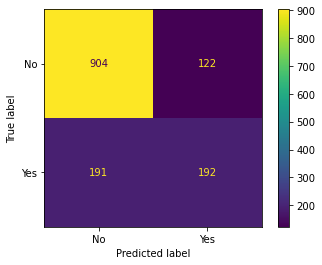

In [306]:
rand_for_predicted = rand_for.predict(X_test)
conf_matrix = confusion_matrix(y_test, rand_for_predicted)
disp_conf_matrix = plot_confusion_matrix(rand_for, X_test, y_test)

c:\Users\Chad\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


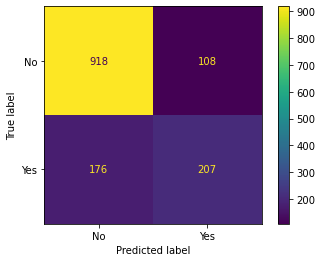

In [ ]:
clf_predicted = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, clf_predicted)
disp_conf_matrix = plot_confusion_matrix(clf, X_test, y_test)

In [ ]:
class_report = classification_report(y_test, clf_predicted)
print(class_report)


              precision    recall  f1-score   support

          No       0.84      0.89      0.87      1026
         Yes       0.66      0.54      0.59       383

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



In [ ]:
proba = clf.predict_log_proba(X_test)

predictions = proba[:, 1]

print(y_test.head())

4922    No
1426    No
4705    No
4048    No
48      No
Name: Churn, dtype: object


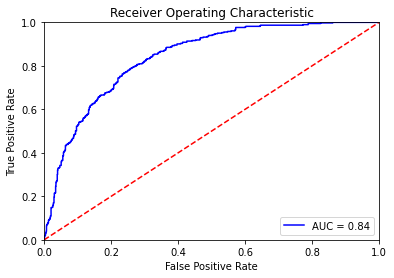

In [ ]:
fpr, tpr, threshold = roc_curve(y_test, predictions, pos_label="Yes")
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()